In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from IPython.display import Image
import scipy
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets('data/MNIST/', one_hot=True)

c:\users\sky\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/MNIST/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/MNIST/t10k-images-idx3-ubyte.gz
Extracting data/MNIST/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


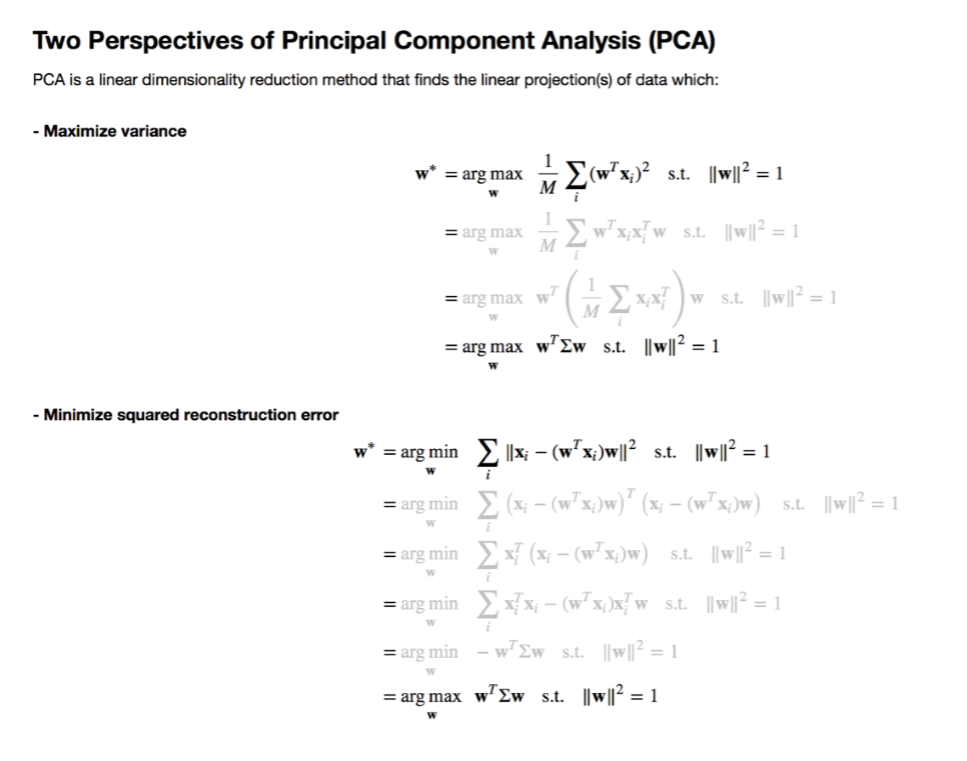

In [2]:
Image(filename='D:/bigdata/Python/pictures/PCA Variance maximize and Reconstruction error minimize.png')

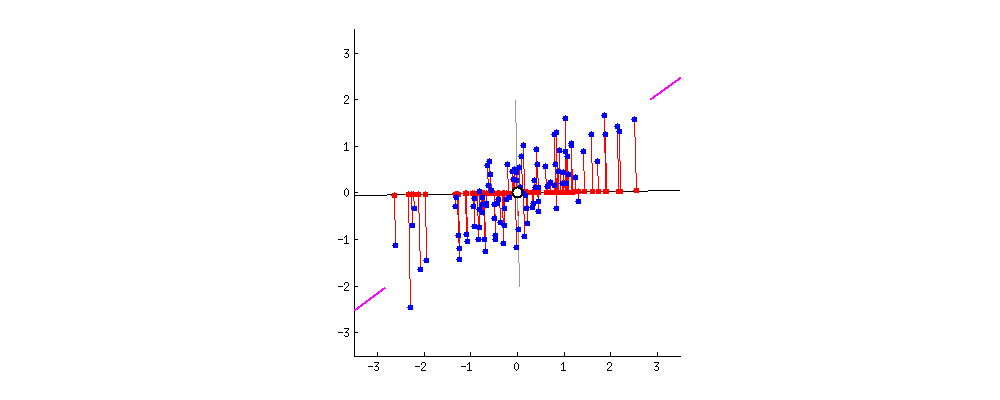

In [3]:
Image(filename='D:/bigdata/Python/pictures/PCA.gif')

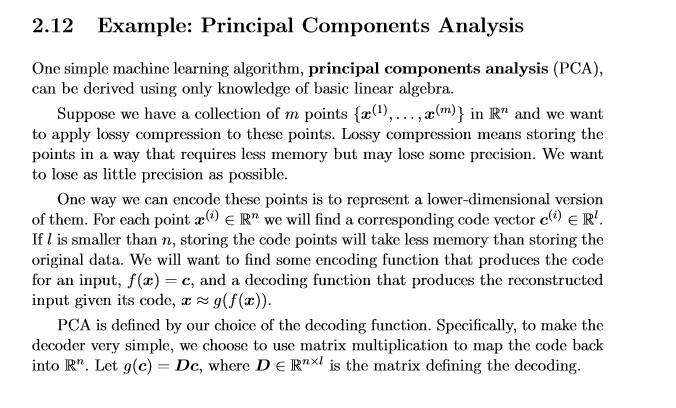

In [4]:
Image(filename='D:/bigdata/Python/pictures/pca proof 1.png')

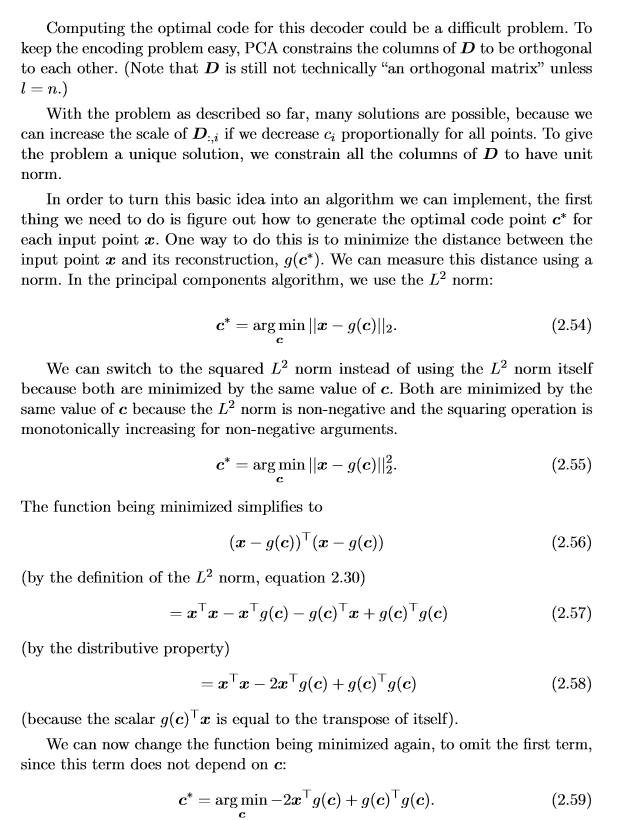

In [5]:
Image(filename='D:/bigdata/Python/pictures/pca proof 2.png')

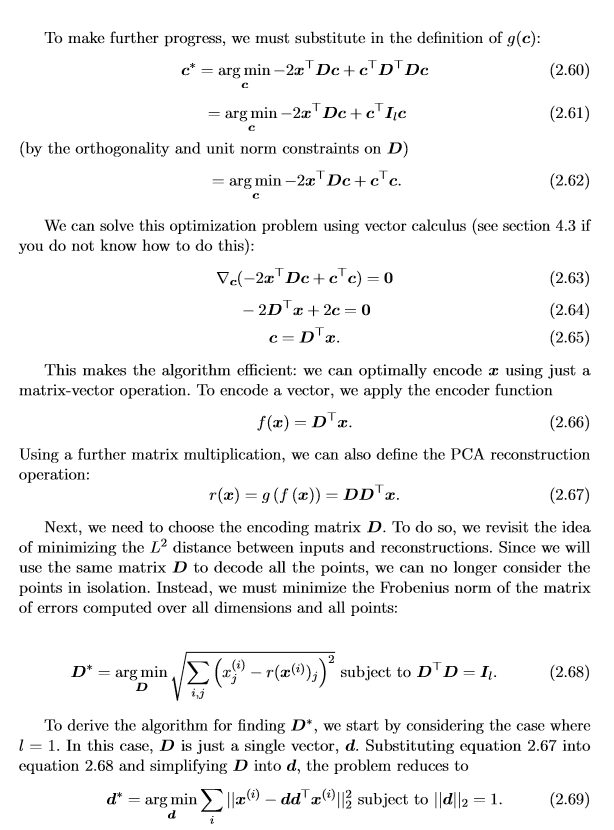

In [6]:
Image(filename='D:/bigdata/Python/pictures/pca proof 3.png')

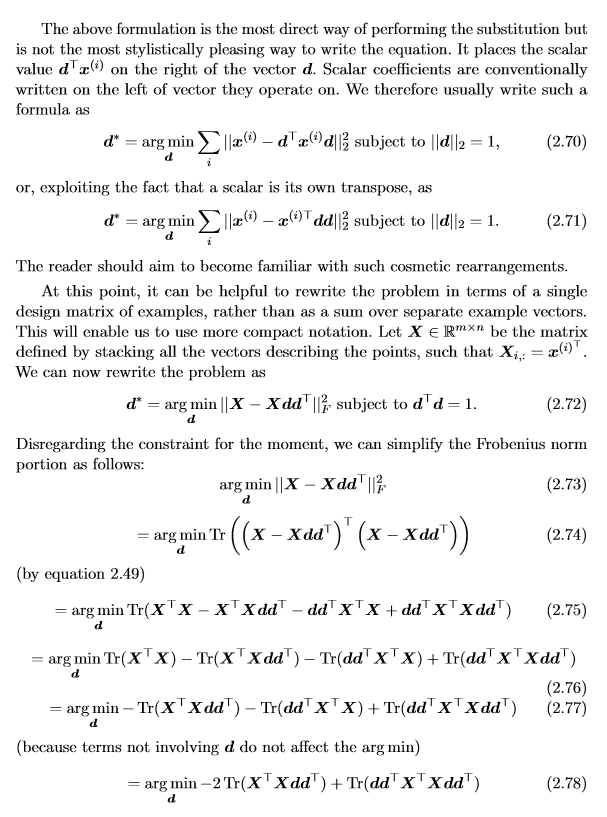

In [7]:
Image(filename='D:/bigdata/Python/pictures/pca proof 4.png')

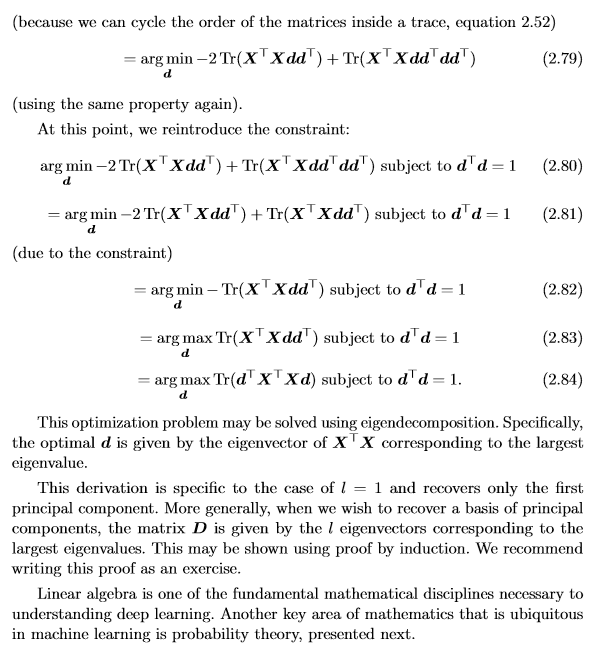

In [8]:
Image(filename='D:/bigdata/Python/pictures/pca proof 5.png')

In [9]:
# Entire Data set
Data=np.array(mnist.train.images)
#centering the data
mu_D=np.mean(Data, axis=0)
Data-=mu_D

In [10]:
COV_MA = np.cov(Data, rowvar=False)

In [11]:
eigen_value, eigenvec=scipy.linalg.eigh(COV_MA, eigvals_only=False)

In [12]:
sorting_list=np.sort(eigen_value)[::-1]
total=sum(eigen_value)

# 784차원 데이터인 MNIST에 linear dimensionality reduction을 실행 했을 때,  약 86차원으로 줄여도 전체 데이터의 variance 중 약 90%정도를 설명할 수 있다. 

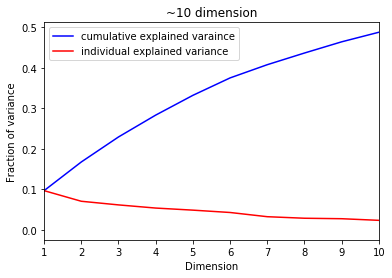

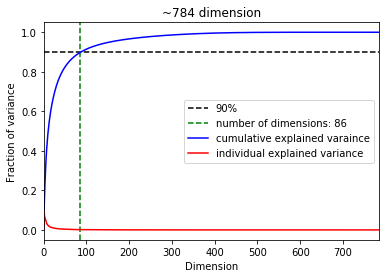

In [13]:
v=[0]
d=[0]
t=0
for i in range(784):
    value=sum(sorting_list[:i+1])/total
    v.append(value)
    d.append(value-sum(sorting_list[:i])/total)
    if value>=0.9 and t==0:
        x_dim=i
        t=1
plt.figure()
plt.xlim(left=1, right=10) 
plt.title('~10 dimension')
plt.ylabel('Fraction of variance')
plt.xlabel('Dimension')
plt.plot(v[:11], color='blue', label='cumulative explained varaince')
plt.plot(d[:11], color='red', label='individual explained variance')
plt.legend()

plt.figure()
plt.xlim(left=1, right=784)
plt.axhline(y=0.9, color='black', linestyle='--', label='90%')
plt.axvline(x=x_dim, color='green', linestyle='--', label='number of dimensions: {}'.format(x_dim))
plt.title('~784 dimension')
plt.ylabel('Fraction of variance')
plt.xlabel('Dimension')
plt.plot(v, color='blue', label='cumulative explained varaince')
plt.plot(d, color='red', label='individual explained variance')
plt.legend()

plt.show()

# PCA reconstruction (optional)

In [14]:
# Entire Data set
Data=np.array(mnist.train.images)

In [15]:
def reconstruct(n, data):
    #centering the data
    DATA=data.copy()
    mu_D=np.mean(DATA, axis=0)
    DATA-=mu_D
    
    DATA=DATA[:100,:]
    u, s, vh = np.linalg.svd(DATA.T, full_matrices=True)
    
    pca_components=u[:,:n]                 ### subject to D.T * D = I
    print(pca_components.shape)
    print(DATA.shape)
    data_reduced = (DATA).dot(pca_components)
    print(data_reduced.shape)
    data_original = np.dot(data_reduced, pca_components.T) # inverse_transform
    print(data_original.shape,'\n\n')
    
    dTd=np.dot(pca_components.T, pca_components)
    ddT=np.dot(pca_components, pca_components.T)
    dTd[dTd>0.9]=1
    dTd[dTd<0.1]=0
    print('dT dot d: ','\n',dTd,'\n\n','dT dot d SHAPE: ',dTd.shape,'\n\n',
          'd dot dT: ','\n',ddT,'\n\n','d dot dT SHAPE: ',ddT.shape)
    data_original+=mu_D
    return data_original

(784, 5)
(100, 784)
(100, 5)
(100, 784) 


dT dot d:  
 [[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]] 

 dT dot d SHAPE:  (5, 5) 

 d dot dT:  
 [[2.9540273e-32 2.3562389e-33 1.0126178e-33 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.3562389e-33 6.0863534e-33 4.2785695e-33 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.0126178e-33 4.2785695e-33 7.4859132e-33 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]] 

 d dot dT SHAPE:  (784, 784)


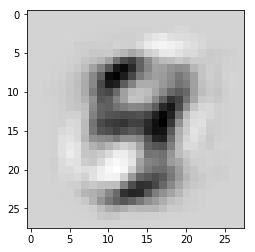

In [16]:
plt.imshow(reconstruct(5,Data)[2].reshape(28,28),cmap='Greys',interpolation='nearest')

(784, 100)
(100, 784)
(100, 100)
(100, 784) 


dT dot d:  
 [[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]] 

 dT dot d SHAPE:  (100, 100) 

 d dot dT:  
 [[ 1.48740961e-30  8.02883448e-32 -9.15915870e-32 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 8.02883448e-32  2.22980125e-30  5.34083460e-31 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-9.15915870e-32  5.34083460e-31  1.40344885e-30 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]] 

 d dot dT SHAPE:  (784, 784)


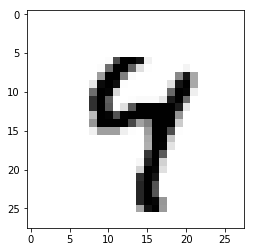

In [17]:
plt.imshow(reconstruct(100, Data)[2].reshape(28,28),cmap='Greys',interpolation='nearest')